## Introduction

#### About the dataset
The dataset for this project was obtaind by exporting chat from Python Community Anambra whatsapp general group. The data exported is a text file that contains activities on the group from between 21st July, 2023 to 6th May, 2024.

#### Aim of project
The aim of this project is to get a general overview of the activities that happened on the group within that period so as to provide insights and help in planning and decision making.

#### Objectives of the project
1. Determine how active the group members are in engaging the platform
2. Understand the flow of persons into and out of the group
3. Discover trends in activity rate
4. Uncover some patterns in how persons use the platform
5. Build dashboards to represent these findings.

#### Duration of project
This project was projected to take at most three days so it started on the 7th May 2024 but was concluded on 12th May 2024, a little longer than the projected duration due to some technical challanges.

#### Tools Used
In the course of completing this project, I used Microsoft Excel, Power Query, and python(jupyter notebook) libraries including pandas, seaborn, matplotlib, nltk, gensim and re.

#### Methodology
1. I exported the data from the whatsapp platform
2. ETL(Extract,Transform, Load) with python into jupyter notebook with re and pandas
3. Data cleaning and transformations with pandas
4. EDA(Exploratory Data Analysis) with pandas, matplotlib and seaborn
5. Export of some partialy cleaned data as csv for further processing with Microsoft power query and Excel.
6. Data cleaning and transformation with Microsoft Power Query
7. Data Analysis with Microsoft Excel's pivot table, formulas and functions
8. Data Visualization with Microsoft Excel's charts
9. Text analysis in jupyter notebook using nltk amd gensim
10. Export of all relevant data as csv for use in Excel
11. Dashboard Building

#### Challanges
1. Initially extracting the data from the text file using regex was a hard one but it was overcomed by research and practice
2. Topic modeling and the preprocessing of text was not easy becaus i dont often do text analysis so the tools are not very familiar

#### Conclusions
The conclussions of this project are summarized in the accompaning dashboard report produced using Microsoft Excel.

Thanks

### Importing the relevant libraries

In [1]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from textblob import TextBlob
# from wordcloud import WordCloud
from gensim.utils import simple_preprocess
from gensim.models import LdaModel
from gensim import corpora

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.max_columns', None)

### Data Extraction Transformation and Loading (ETL)

In [2]:
data = []# to hold the data when extracted

# extract the text by readigthe document and looping over the lines
with open('pycom_chat1.txt', 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        match = re.match(r'^(\d{1,2}\/\d{1,2}\/\d{1,2}, \d{1,2}:\d{1,2}\s{1}(AM|PM))(\s{1}-(\s{1}.*:(?= )))(.*)$', line)
        match_left = re.match(r'^(\d{1,2}\/\d{1,2}\/\d{1,2}, \d{1,2}:\d{1,2}\s{1}(AM|PM))(\s{1}-(\s{1}))((.*)(left)$)', line)
        match_add = re.match(r'^(\d{1,2}\/\d{1,2}\/\d{1,2}, \d{1,2}:\d{1,2}\s{1}(AM|PM))(\s{1}-(\s{1}))((.*)(added)(.*)$)', line)
        match_req = re.match(r'^(\d{1,2}\/\d{1,2}\/\d{1,2}, \d{1,2}:\d{1,2}\s{1}(AM|PM))(\s{1}-(\s{1}))((.*)(requested to join.)$)', line)
        match_joined = re.match(r'^(\d{1,2}\/\d{1,2}\/\d{1,2}, \d{1,2}:\d{1,2}\s{1}(AM|PM))(\s{1}-(\s{1}))((.*)(joined using this group\'s invite link)$)', line)
        match_join_frm_com = re.match(r'^(\d{1,2}\/\d{1,2}\/\d{1,2}, \d{1,2}:\d{1,2}\s{1}(AM|PM))(\s{1}-(\s{1}))((.*)(joined from the community)$)', line)
        match_pinned_mes = re.match(r'^(\d{1,2}\/\d{1,2}\/\d{1,2}, \d{1,2}:\d{1,2}\s{1}(AM|PM))(\s{1}-(\s{1}))((.*)(pinned a message)$)', line)
        match_change_num = re.match(r'^(\d{1,2}\/\d{1,2}\/\d{1,2}, \d{1,2}:\d{1,2}\s{1}(AM|PM))(\s{1}-(\s{1}))((.*)(Tap to message or add the new number.)$)', line)
        match_joined_by_my_invite = re.match(r'^(\d{1,2}\/\d{1,2}\/\d{1,2}, \d{1,2}:\d{1,2}\s{1}(AM|PM))(\s{1}-(\s{1}))((.*)(joined using your invite)$)', line)
        match_others_1 = re.match(r'^(\d{1,2}\/\d{1,2}\/\d{1,2}, \d{1,2}:\d{1,2}\s{1}(AM|PM))(\s{1}-(\s{1}))((.*)(except when kept.)$)', line)
        match_others_2 = re.match(r'^(\d{1,2}\/\d{1,2}\/\d{1,2}, \d{1,2}:\d{1,2}\s{1}(AM|PM))(\s{1}-(\s{1}))((.*)(disappearing messages.)$)', line)
        match_others_3 = re.match(r'^(\d{1,2}\/\d{1,2}\/\d{1,2}, \d{1,2}:\d{1,2}\s{1}(AM|PM))(\s{1}-(\s{1}))((You removed)(.*)$)', line)
        match_others_4 = re.match(r'^(\d{1,2}\/\d{1,2}\/\d{1,2}, \d{1,2}:\d{1,2}\s{1}(AM|PM))(\s{1}-(\s{1}))((Anyone in this group is now a community member)(.*)$)', line)
        match_others_5 = re.match(r'^(\d{1,2}\/\d{1,2}\/\d{1,2}, \d{1,2}:\d{1,2}\s{1}(AM|PM))(\s{1}-(\s{1}))((.*)(changed to)(.*)$)', line)
        
        
        if match:
            global p1
            p1 = match.group(1)
            global p2
            p2 = match.group(4)
            global p3
            p3 = match.group(5)
            mes = "message" # to track the type of text
        elif match_left:
            p1 = match_left.group(1)  
            p2 = match_left.group(6)
            p3 = match_left.group(7)
            mes = "left"
        elif match_add:
            p1 = match_add.group(1)  
            p2 = match_add.group(6)
            p3 = match_add.group(7)+" "+match_add.group(8)
            mes = "added"
        elif match_req:
            p1 = match_req.group(1)  
            p2 = match_req.group(6)
            p3 = match_req.group(7)
            mes = "join request"
        elif match_joined:
            p1 = match_joined.group(1)  
            p2 = match_joined.group(6)
            p3 = match_joined.group(7)
            mes = "joined"
        elif match_join_frm_com:
            p1 = match_join_frm_com.group(1)  
            p2 = match_join_frm_com.group(6)
            p3 = match_join_frm_com.group(7)
            mes = "joined"
        elif match_joined_by_my_invite:
            p1 = match_joined_by_my_invite.group(1)  
            p2 = match_joined_by_my_invite.group(6)
            p3 = match_joined_by_my_invite.group(7)
            mes = "joined"
        elif match_pinned_mes:
            p1 = match_pinned_mes.group(1)  
            p2 = match_pinned_mes.group(6)
            p3 = match_pinned_mes.group(7)
            mes = "pinned a message"
        elif match_change_num:
            p1 = match_change_num.group(1)  
            p2 = match_change_num.group(6)
            p3 = match_change_num.group(7)
            mes = "changed number"
        elif match_others_1:
            p1 = match_others_1.group(1)  
            p2 = match_others_1.group(6)
            p3 = match_others_1.group(7)
            mes = "others"
        elif match_others_2:
            p1 = match_others_2.group(1)  
            p2 = match_others_2.group(6)
            p3 = match_others_2.group(7)
            mes = "others"
        elif match_others_3:
            p1 = match_others_3.group(1)  
            p2 = match_others_3.group(6)
            p3 = match_others_3.group(7)
            mes = "others"
        elif match_others_4:
            p1 = match_others_4.group(1)  
            p2 = match_others_4.group(6)
            p3 = match_others_4.group(7)
            mes = "others"
        elif match_others_5:
            p1 = match_others_5.group(1)  
            p2 = match_others_5.group(6)
            p3 = match_others_5.group(7)+" "+match_others_5.group(8)
            mes = "others"
        else:
#             print(line)
            p3 += "\n"
            p3 += line
            mes = "message"
            data.pop()# delete the last added item
        data.append([p1, p2, mes, p3])

df = pd.DataFrame(data, columns = ['datetime', 'name', 'type', 'detail'])

In [3]:
df.info() # to get some basic information about the newly cteated dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  844 non-null    object
 1   name      844 non-null    object
 2   type      844 non-null    object
 3   detail    844 non-null    object
dtypes: object(4)
memory usage: 26.5+ KB


### More data cleaning and transformation

In [5]:
df["date"] = df["datetime"].str.split(', ').str[0]
df["time"] = df["datetime"].str.split(', ').str[-1]
df["date"] = pd.to_datetime(df.date)
df["time"] = pd.to_datetime(df.time)
df["time"] = df.time.dt.time
df["year"] = df.date.dt.year.astype('int')
df["month"] = df.date.dt.month
df["day"] = df.date.dt.day

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  844 non-null    object        
 1   name      844 non-null    object        
 2   type      844 non-null    object        
 3   detail    844 non-null    object        
 4   date      844 non-null    datetime64[ns]
 5   time      844 non-null    object        
 6   year      844 non-null    int32         
 7   month     844 non-null    int32         
 8   day       844 non-null    int32         
dtypes: datetime64[ns](1), int32(3), object(5)
memory usage: 49.6+ KB


### Exploratory Data Analysis

In [7]:
total_count_of_engagements = df.name.count()
total_count_of_engagements

844

In [8]:
# Summary of the differnt types of engagement
df.groupby('type').agg(no_of_engagements = ('date','count'))\
.sort_values('no_of_engagements', ascending=False)

,no_of_engagements
type,
message,613
joined,95
join request,94
left,17
added,11
pinned a message,6
others,5
changed number,3


In [10]:
df_messages = df[df.type == "message"] # an extract of only message engagements

In [11]:
# extracting hours from the time column
df_messages["hours"] = df_messages.time
def time_to_hours(x):
    t = str(x)
    hour = t.split(":")[0]
    hour = int(hour)
    if hour < 4:
        return "0 - 3"
    elif hour < 7:
        return "4 - 6"
    elif hour < 10:
        return "7 - 9"
    elif hour < 13:
        return "10 - 12"
    elif hour < 16:
        return "13 - 15"
    elif hour < 19:
        return "16 - 18"
    elif hour < 22:
        return "19 - 21"
    else:
        return "22 - 23"   
df_messages.hours = df_messages.hours.apply(time_to_hours)

In [12]:
chat_by_month = df_messages.groupby(['year', 'month']).\
agg(No_of_engagements = ('date','count'))
chat_by_month

No_of_engagements
year month                   
2023 6                     44
     7                     76
     8                     62
     9                     47
     10                    52
     11                    15
     12                    15
2024 1                     20
     2                     81
     3                    132
     4                     62
     5                      7

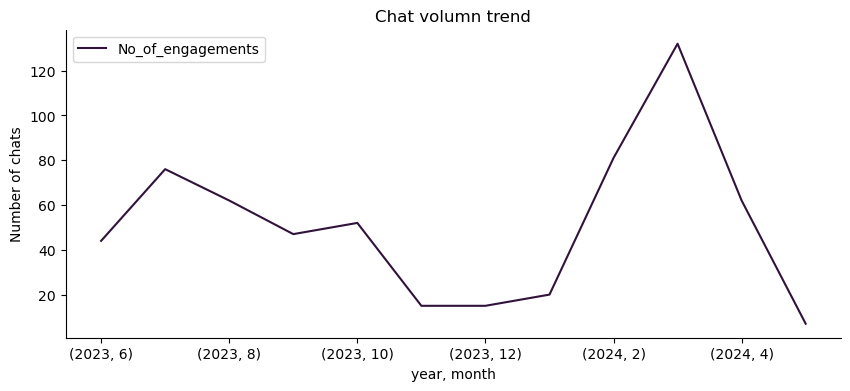

In [13]:
fig, ax = plt.subplots(figsize=(10, 4))
chat_by_month.plot(title="Chat volumn trend", xlabel="year, month",
                            ylabel="Number of chats", colormap = 'turbo', ax = ax)
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

In [14]:
df_messages.groupby('name').agg(no_of_chats = ('date','count'))\
.sort_values('no_of_chats', ascending=False) 
# see the individuals in the group by number of engagements

,no_of_chats
name,
~klemz:,231
Okeoma GeoStat:,66
Uzodimma PyCom:,34
Maggie ❤️:,31
Joe Ibe Pycom:,18
...,...
+234 904 157 9470:,1
Chijioke Larryson:,1
Charles I Pycom:,1


In [15]:
active_hours = df_messages.groupby('hours').agg(no_of_chats = ('date','count'))\
.sort_values('no_of_chats', ascending=False)
active_hours

,no_of_chats
hours,
19 - 21,139
10 - 12,135
7 - 9,118
16 - 18,82
13 - 15,65
22 - 23,46
4 - 6,19
0 - 3,9


In [16]:
# All the adding and joining engagements
df_joined = df[(df.type == "joined") | (df.type == "added")]

In [17]:
joinings_by_month = df_joined.groupby(['year', 'month']).\
agg(No_of_joins = ('date','count'))
joinings_by_month

No_of_joins
year month             
2023 7                3
     8                5
     9                3
     10               3
     11               1
     12               1
2024 1                1
     2               29
     3               39
     4               18
     5                3

In [ ]:
# Exporting of relevant dataframes as csv
# df.to_csv('python_gro_chat.csv', index = False)
# active_hours.to_csv('python_gro_active_hours.csv')

### Text analysis

In [18]:
# Extract relevant section of messages dataframe for text analysis
df_msg_details = df_messages[["name", "detail"]]

#### Data preparation for text analysis

In [20]:
# set stop words
stop_words = set(stopwords.words('english'))

In [21]:
#replace anycharacter not a-zA-Z with white space
rt = lambda x: re.sub("[^a-zA-Z]", ' ',str(x))
df_msg_details['detail'] = df_msg_details['detail'].map(rt)
# transform chat details to all lowercase
df_msg_details['detail'] = df_msg_details['detail'].str.lower()
# To remove any whitespaces from front and back of string
df_msg_details['detail'] = df_msg_details.detail.apply(lambda x: x.strip())
# To preprocess text data
df_msg_details['detail'] = df_msg_details.detail.apply(lambda x: simple_preprocess(x))
# Define a function to remove stop words
def remove_stop_words(words):
    filtered_ = [word for word in words if word not in stop_words]
    return filtered_
# apply stop word removal
df_msg_details['detail'] = df_msg_details['detail'].apply(remove_stop_words)

#### Topic modeling

In [22]:
# create gensim dictionary
gen_dict = corpora.Dictionary(df_msg_details['detail'])
# create bag of eords from generated dictionary object
gen_corpus = [gen_dict.doc2bow(doc) for doc in df_msg_details['detail']]

In [35]:
# Train LDA topic
lda_model = LdaModel(corpus = gen_corpus, id2word=gen_dict, \
                     num_topics = 5, passes=15, random_state = 0)

In [24]:
# Extract topic as text
topic_as_text = []
for topic in lda_model.print_topics(num_words =5):
    # the number of words can be changed
    topic_as_text.append(topic[1])

topic_as_text

['0.018*"ai" + 0.015*"new" + 0.012*"month" + 0.012*"python" + 0.009*"list"',
 '0.045*"media" + 0.042*"omitted" + 0.024*"thank" + 0.015*"thanks" + 0.011*"hello"',
 '0.035*"community" + 0.015*"https" + 0.015*"us" + 0.014*"anambra" + 0.011*"everyone"',
 '0.011*"https" + 0.011*"tech" + 0.010*"com" + 0.009*"internship" + 0.008*"skills"',
 '0.033*"good" + 0.028*"everyone" + 0.018*"morning" + 0.010*"evening" + 0.009*"resume"']

In [25]:
# replace all the " + " with "," in the topic_as_text
topic_as_text = [t.replace(' + ',',') for t in topic_as_text]
# split the text by "," to get a list of a topic and 
# its phi value(liklihood of text being that topic)
topic_as_text = [t.split(',') for t in topic_as_text]
print(topic_as_text)

[['0.018*"ai"', '0.015*"new"', '0.012*"month"', '0.012*"python"', '0.009*"list"'], ['0.045*"media"', '0.042*"omitted"', '0.024*"thank"', '0.015*"thanks"', '0.011*"hello"'], ['0.035*"community"', '0.015*"https"', '0.015*"us"', '0.014*"anambra"', '0.011*"everyone"'], ['0.011*"https"', '0.011*"tech"', '0.010*"com"', '0.009*"internship"', '0.008*"skills"'], ['0.033*"good"', '0.028*"everyone"', '0.018*"morning"', '0.010*"evening"', '0.009*"resume"']]


In [26]:
# see the best topics
best_topics = []
for topics in topic_as_text:
    best_topics_ = []
    for t in topics:
        # match the topics only
        match_topics = re.match(r'(^(.*)(")(.*)(")(.*)$)', t)
        best_topics_.append(match_topics.group(4))
    best_topics.append(best_topics_)
print(best_topics)

[['ai', 'new', 'month', 'python', 'list'], ['media', 'omitted', 'thank', 'thanks', 'hello'], ['community', 'https', 'us', 'anambra', 'everyone'], ['https', 'tech', 'com', 'internship', 'skills'], ['good', 'everyone', 'morning', 'evening', 'resume']]


In [27]:
topics_summary = ["web analytics and data", "social inclusion", \
              "career development", "AI and Assistance", "Python and monthly activities"]
topics_summary

['web analytics and data',
 'social inclusion',
 'career development',
 'AI and Assistance',
 'Python and monthly activities']

In [28]:
# Extract Topic models
df_msg_details['topics'] = df_msg_details['detail']\
.apply(lambda x: lda_model[gen_dict.doc2bow(x)])

In [30]:
# Extracting the topics fro the topic models using the topic_summary
def topic_select(x):
    for t in x:
        if t[1] == max(x, key= lambda tp: tp[1])[1]:
            if t[0] == 0:
                return "Web Analytics and Data"
            elif t[0] == 1:
                return "Social Inclusion"
            elif t[0] == 2:
                return "Career Development"
            elif t[0] == 3:
                return "AI and Assistance"
            elif t[0] == 4:
                return "Python and monthly activities"

df_msg_details['topic'] = df_msg_details['topics'].apply(topic_select)

In [31]:
Popular_topics = df_msg_details.groupby('topic').agg(no_of_times = ('name','count'))\
.sort_values('no_of_times', ascending=False)
Popular_topics

,no_of_times
topic,
Social Inclusion,164
Python and monthly activities,139
Career Development,125
Web Analytics and Data,100
AI and Assistance,85


In [ ]:
# export to csv
# Popular_topics.to_csv('python_Popular_topics.csv')

#### Sentiment analysis

In [32]:
# function to rejoin words that were splitted during cleaning
def rejoin_words(list_):
    words = ' '.join([word for word in list_])
    return words
# apply the function
df_msg_details['detail_'] = df_msg_details['detail'].apply(rejoin_words)

In [33]:
# function to generate sentiment of individual chats
for index, row in df_msg_details['detail_'].items():
    
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    
    if neg > pos:
        df_msg_details.loc[index, 'sentiment'] = 'Negative'
    elif pos > neg:
        df_msg_details.loc[index, 'sentiment'] = 'Posetive'
    else:
        df_msg_details.loc[index, 'sentiment'] = 'Neutral'

In [34]:
# extract for export, relevant portion of dataframe for sentiment analysis
df_msg_details2 = df_msg_details[["name", "detail_", "sentiment"]]

In [ ]:
# Export to csv for data visualization and dashboard creation
# df_msg_details2.to_csv('python_gro_chat_sentiment.csv', index = False)